In [1]:
#pip install jupyter_scheduler

In [343]:
#!pip install "snowflake-connector-python[pandas]"

In [344]:
#!pip install snowflake-snowpark-python

In [445]:
from snowflake.snowpark import Session
import warnings
warnings.filterwarnings('ignore')

In [346]:
import getpass

In [ ]:
#password=getpass.getpass("Type the password:")
session = Session.builder.configs({
 "account": "VPXEDAL-EY92372",
 "user": "PRAVAT21",
 #"password": password,
 #"password": "",
 "warehouse": "PP_WAREHOUSE",
 "database": "PP_PROJECT",
 "schema": "PUBLIC"
 }).create()

In [348]:
# Load table into a Snowpark DataFrame
demographic_raw = session.table("PP_demographic_RAW").to_pandas()
demographic_raw.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,HOUSEHOLD_KEY
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


In [349]:
CAMPAIGN_DESC_RAW = session.table("PP_CAMPAIGN_DESC_RAW").to_pandas()
CAMPAIGN_DESC_RAW.head()

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY
0,TypeB,24,659,719
1,TypeC,15,547,708
2,TypeB,25,659,691
3,TypeC,20,615,685
4,TypeB,23,646,684


In [350]:
CAMPAIGN_RAW = session.table("PP_CAMPAIGN_RAW").to_pandas()
CAMPAIGN_RAW.head()

,DESCRIPTION,HOUSEHOLD_KEY,CAMPAIGN
0,TypeA,17,26
1,TypeA,27,26
2,TypeA,212,26
3,TypeA,208,26
4,TypeA,192,26


In [351]:
COUPON_RAW = session.table("PP_COUPON_RAW").to_pandas()
COUPON_RAW.head()

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25


In [352]:
COUPON_REDEMPT_RAW = session.table("PP_COUPON_REDEMPT_RAW").to_pandas()
COUPON_REDEMPT_RAW.head()

,HOUSEHOLD_KEY,DAY,COUPON_UPC,CAMPAIGN
0,1,421,10000085364,8
1,1,421,51700010076,8
2,1,427,54200000033,8
3,1,597,10000085476,18
4,1,597,54200029176,18


In [353]:
PRODUCT_RAW = session.table("PP_PRODUCT_RAW").to_pandas()
PRODUCT_RAW.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,None
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,None
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [354]:
TRANSACTION_RAW = session.table("PP_TRANSACTION_RAW2").to_pandas()
TRANSACTION_RAW.head()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0,0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0,0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0,0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0,0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0,0


In [355]:
TRANSACTION_RAW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450416 entries, 0 to 450415
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   HOUSEHOLD_KEY      450416 non-null  int16  
 1   BASKET_ID          450416 non-null  int64  
 2   DAY                450416 non-null  int16  
 3   PRODUCT_ID         450416 non-null  int32  
 4   QUANTITY           450416 non-null  int32  
 5   SALES_VALUE        450416 non-null  float64
 6   STORE_ID           450416 non-null  int16  
 7   RETAIL_DISC        450416 non-null  float64
 8   TRANS_TIME         450416 non-null  int16  
 9   WEEK_NO            450416 non-null  int8   
 10  COUPON_DISC        450416 non-null  int8   
 11  COUPON_MATCH_DISC  450416 non-null  int8   
dtypes: float64(2), int16(4), int32(2), int64(1), int8(3)
memory usage: 18.5 MB


In [356]:
TRANSACTION_RAW['DAY'].sample(5)

251178    124
368016    155
377803    158
394599    163
423420    169
Name: DAY, dtype: int16

____________________________________________________________________________________________________________________
- **1. I have observed that the `DAY` column consists INT values. So I have to convert it into date.** ⏳
_________________________________________________________________________________________________________________

In [357]:
from datetime import datetime,timedelta
import pandas as pd
import numpy as np

In [358]:
start_date=pd.to_datetime("2020-01-01")

In [359]:
TRANSACTION_RAW['CONVERTED DATE']=start_date+pd.to_timedelta(TRANSACTION_RAW['DAY']-1,unit='D')

In [360]:
TRANSACTION_RAW.head(2)

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,CONVERTED DATE
0,2375,26984851472,1,1004906,1,1.39,364,-0.6,1631,1,0,0,2020-01-01
1,2375,26984851472,1,1033142,1,0.82,364,0.0,1631,1,0,0,2020-01-01


In [361]:
df=TRANSACTION_RAW.pop('CONVERTED DATE')

In [362]:
TRANSACTION_RAW.insert(2,'CONVERTED_DATE',df)

In [363]:
TRANSACTION_RAW.drop(columns=['DAY'],inplace=True)

In [364]:
TRANSACTION_RAW.head(2)

,HOUSEHOLD_KEY,BASKET_ID,CONVERTED_DATE,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,2020-01-01,1004906,1,1.39,364,-0.6,1631,1,0,0
1,2375,26984851472,2020-01-01,1033142,1,0.82,364,0.0,1631,1,0,0


In [366]:
TRANSACTION_RAW['CONVERTED_DATE']=TRANSACTION_RAW['CONVERTED_DATE'].apply(lambda x:x.date())

In [367]:
TRANSACTION_RAW.dtypes

HOUSEHOLD_KEY          int16
BASKET_ID              int64
CONVERTED_DATE        object
PRODUCT_ID             int32
QUANTITY               int32
SALES_VALUE          float64
STORE_ID               int16
RETAIL_DISC          float64
TRANS_TIME             int16
WEEK_NO                 int8
COUPON_DISC             int8
COUPON_MATCH_DISC       int8
dtype: object

____________________________________________________________________________________________
- **Converting INT date into datetime has been done.** ✅
_____________________________________________________________________________________________

In [368]:
CAMPAIGN_DESC_RAW.head()

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY
0,TypeB,24,659,719
1,TypeC,15,547,708
2,TypeB,25,659,691
3,TypeC,20,615,685
4,TypeB,23,646,684


____________________________________________________________________________________________________________________
- **2. I have observed that the `START_DAY`& `END_DAY` columns consist same type of INT values. So I have to convert it into date.** ⏳
_________________________________________________________________________________________________________________

In [369]:
CAMPAIGN_DESC_RAW['START_DAY']=start_date+pd.to_timedelta(CAMPAIGN_DESC_RAW['START_DAY']-1,unit='D')

In [370]:
CAMPAIGN_DESC_RAW['END_DAY']=start_date+pd.to_timedelta(CAMPAIGN_DESC_RAW['END_DAY']-1,unit='D')

In [371]:
CAMPAIGN_DESC_RAW.head(4)

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY
0,TypeB,24,2021-10-20,2021-12-19
1,TypeC,15,2021-06-30,2021-12-08
2,TypeB,25,2021-10-20,2021-11-21
3,TypeC,20,2021-09-06,2021-11-15


In [372]:
CAMPAIGN_DESC_RAW['CAMP_DURATION']=(CAMPAIGN_DESC_RAW['END_DAY']-CAMPAIGN_DESC_RAW['START_DAY']).dt.days

In [373]:
CAMPAIGN_DESC_RAW['START_DAY']=CAMPAIGN_DESC_RAW['START_DAY'].apply(lambda x: x.date())

In [374]:
CAMPAIGN_DESC_RAW['END_DAY']=CAMPAIGN_DESC_RAW['END_DAY'].apply(lambda x: x.date())

In [375]:
CAMPAIGN_DESC_RAW.dtypes

DESCRIPTION      object
CAMPAIGN           int8
START_DAY        object
END_DAY          object
CAMP_DURATION     int64
dtype: object

____________________________________________________________________________________________
- **Converting INT date into datetime has been done.** ✅
_____________________________________________________________________________________________

In [376]:
COUPON_REDEMPT_RAW.head()

,HOUSEHOLD_KEY,DAY,COUPON_UPC,CAMPAIGN
0,1,421,10000085364,8
1,1,421,51700010076,8
2,1,427,54200000033,8
3,1,597,10000085476,18
4,1,597,54200029176,18


In [377]:
COUPON_REDEMPT_RAW['DAY']=start_date+pd.to_timedelta(COUPON_REDEMPT_RAW['DAY']-1,unit='D')

In [378]:
COUPON_REDEMPT_RAW['DAY']=COUPON_REDEMPT_RAW['DAY'].apply(lambda x: x.date())

In [379]:
COUPON_REDEMPT_RAW.head()

,HOUSEHOLD_KEY,DAY,COUPON_UPC,CAMPAIGN
0,1,2021-02-24,10000085364,8
1,1,2021-02-24,51700010076,8
2,1,2021-03-02,54200000033,8
3,1,2021-08-19,10000085476,18
4,1,2021-08-19,54200029176,18


In [380]:
COUPON_REDEMPT_RAW.dtypes

HOUSEHOLD_KEY     int16
DAY              object
COUPON_UPC        int64
CAMPAIGN           int8
dtype: object

____________________________________________________________________________________________
- **Converting INT date into datetime has been done.** ✅
_____________________________________________________________________________________________

## Understanding the dataset

In [381]:
demographic_raw.shape

(2500, 8)

In [382]:
demographic_raw.isnull().sum()

AGE_DESC               0
MARITAL_STATUS_CODE    0
INCOME_DESC            0
HOMEOWNER_DESC         0
HH_COMP_DESC           0
HOUSEHOLD_SIZE_DESC    0
KID_CATEGORY_DESC      0
HOUSEHOLD_KEY          0
dtype: int64

In [383]:
demographic_raw['AGE_DESC'].value_counts()

AGE_DESC
45-54    901
35-44    594
25-34    445
65+      230
55-64    187
19-24    143
Name: count, dtype: int64

In [384]:
demographic_raw['HOUSEHOLD_SIZE_DESC'].value_counts()

HOUSEHOLD_SIZE_DESC
2     1004
1      783
3      338
5+     206
4      169
Name: count, dtype: int64

In [385]:
CAMPAIGN_DESC_RAW.shape

(30, 5)

In [386]:
CAMPAIGN_DESC_RAW.isnull().sum()

DESCRIPTION      0
CAMPAIGN         0
START_DAY        0
END_DAY          0
CAMP_DURATION    0
dtype: int64

In [387]:
CAMPAIGN_DESC_RAW['CAMP_DURATION'].mean()

46.6

In [388]:
import matplotlib.pyplot as plt
import seaborn as sns

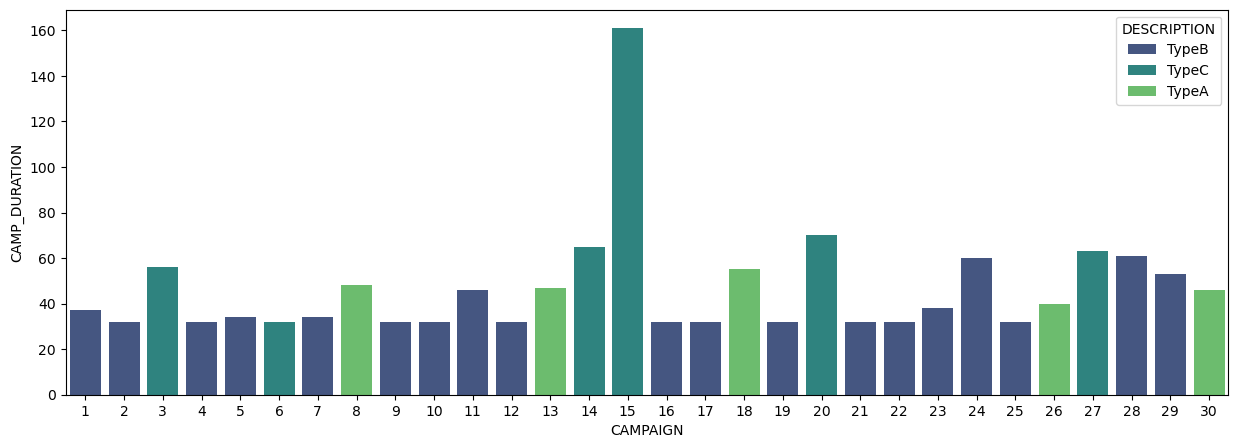

In [390]:
plt.figure(figsize=(15,5))
sns.barplot(x='CAMPAIGN',y=CAMPAIGN_DESC_RAW['CAMP_DURATION'],hue='DESCRIPTION',data = CAMPAIGN_DESC_RAW, palette="viridis")
plt.show()

- **Campaign 15 Lasted more than 160 days.** 📝

In [391]:
CAMPAIGN_DESC_RAW.groupby(by='DESCRIPTION').aggregate({'CAMPAIGN':'count',
                                                      'CAMP_DURATION':'mean'}).reset_index()

,DESCRIPTION,CAMPAIGN,CAMP_DURATION
0,TypeA,5,47.200000
1,TypeB,19,37.631579
2,TypeC,6,74.500000


- **There have been 19 type B campaigns, whose average length was 38 days. In comparison, there has been 6 type C campaigns of 75 days on average.** 📝

In [392]:
CAMPAIGN_RAW['HOUSEHOLD_KEY'].nunique()

1584

In [393]:
TRANSACTION_RAW['HOUSEHOLD_KEY'].nunique()

2494

- **We observed that (2500-1584)=916 houesehold didn't participate into any campaign.** 📝

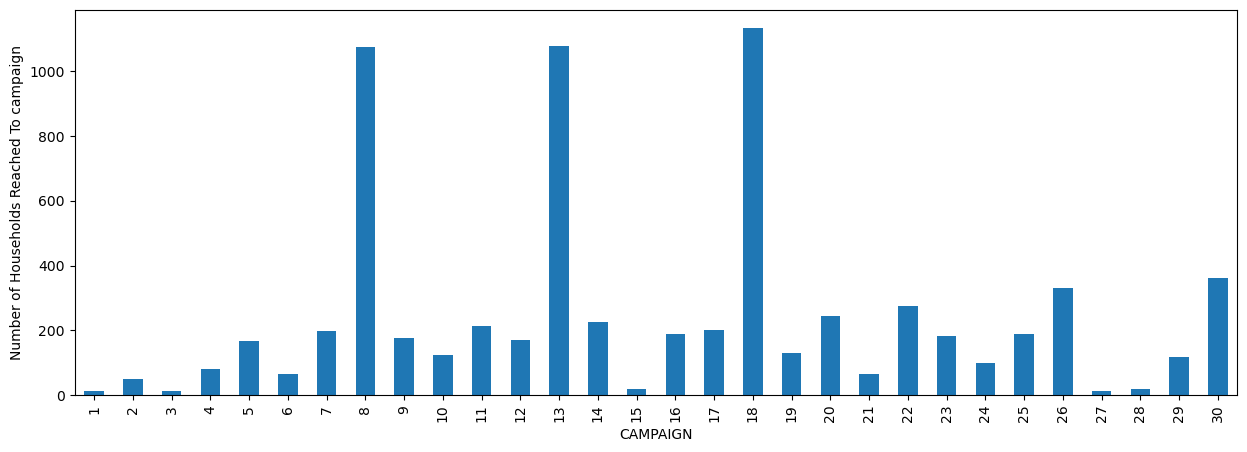

In [394]:
plt.figure(figsize=(15,5))
CAMPAIGN_RAW.groupby('CAMPAIGN')['HOUSEHOLD_KEY'].count().plot.bar()
plt.ylabel('Number of Households Reached To campaign')
plt.show()

- **we observed that in the there are few numbers of perticipants into campaign no. `1,3,15,27,28`.** 📝
- **But in the campaign no. `8,13,18` there are huge no. of perticipants.** 📝
  - **Among these, in the campaign no.`8` there are highest no. of perticipants.** 📝

In [395]:
Coupon_Given=COUPON_RAW.groupby("CAMPAIGN").aggregate(Total_product = ('PRODUCT_ID','nunique'),
                                                    Total_Coupon_Given = ('COUPON_UPC','nunique')).reset_index()

In [396]:
Coupon_Given.sort_values(by='Total_product',ascending=False).head(10)

,CAMPAIGN,Total_product,Total_Coupon_Given
12,13,35616,207
17,18,35513,209
7,8,17178,209
25,26,3396,181
29,30,3205,181
21,22,1917,21
23,24,1887,2
15,16,1025,13
24,25,826,17
8,9,825,18


In [397]:
Coupon_Given=Coupon_Given.merge(right=CAMPAIGN_DESC_RAW,how='left',on='CAMPAIGN')

In [398]:
Coupon_Given.sort_values(by=['Total_product','Total_Coupon_Given'],ascending=[False,False],inplace=True)

In [399]:
Coupon_Given.head()

,CAMPAIGN,Total_product,Total_Coupon_Given,DESCRIPTION,START_DAY,END_DAY,CAMP_DURATION
12,13,35616,207,TypeA,2021-05-18,2021-07-04,47
17,18,35513,209,TypeA,2021-08-09,2021-10-03,55
7,8,17178,209,TypeA,2021-02-15,2021-04-04,48
25,26,3396,181,TypeA,2020-08-11,2020-09-20,40
29,30,3205,181,TypeA,2020-11-18,2021-01-03,46


In [400]:
COUPON_RAW.head()

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25


In [401]:
PRODUCT_RAW.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,None
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,None
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [402]:
coupon_product = COUPON_RAW.merge(right=PRODUCT_RAW,on='PRODUCT_ID',how='left')

In [403]:
coupon_product.head()

,COUPON_UPC,PRODUCT_ID,CAMPAIGN,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,10000089061,27160,4,69,GROCERY,Private,SHORTENING/OIL,VEGETABLE/SALAD OIL,48 OZ
1,10000089064,27754,9,69,GROCERY,Private,FRZN VEGETABLE/VEG DSH,FRZN BAGGED VEGETABLES - PLAIN,16 OZ
2,10000089073,28897,12,69,GROCERY,Private,EGGS,EGGS - X-LARGE,A D 1 DZ
3,51800009050,28919,28,236,GROCERY,National,REFRGRATD DOUGH PRODUCTS,REFRIGERATED COOKIES-CHUB,16.5 OZ
4,52100000076,28929,25,317,GROCERY,National,CHEESE,STRING CHEESE,AB 8 OZ


In [404]:
coupon_product['COMMODITY_DESC'].value_counts().head(10)

COMMODITY_DESC
HAIR CARE PRODUCTS        6261
MAKEUP AND TREATMENT      5585
FRZN MEAT/MEAT DINNERS    4893
FROZEN PIZZA              3658
BEEF                      3314
ICE CREAM/MILK/SHERBTS    3257
CHEESE                    3146
YOGURT                    2460
ORAL HYGIENE PRODUCTS     2437
LUNCHMEAT                 2425
Name: count, dtype: int64

In [405]:
coupon_product.head(2)

,COUPON_UPC,PRODUCT_ID,CAMPAIGN,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,10000089061,27160,4,69,GROCERY,Private,SHORTENING/OIL,VEGETABLE/SALAD OIL,48 OZ
1,10000089064,27754,9,69,GROCERY,Private,FRZN VEGETABLE/VEG DSH,FRZN BAGGED VEGETABLES - PLAIN,16 OZ


In [406]:
campaign_dept_prod=coupon_product.groupby(by=['CAMPAIGN','DEPARTMENT'])['PRODUCT_ID'].count().reset_index()

In [407]:
campaign_dept_prod.head()

,CAMPAIGN,DEPARTMENT,PRODUCT_ID
0,1,GROCERY,383
1,2,GROCERY,295
2,2,MEAT-PCKGD,6
3,3,COSMETICS,2
4,3,DRUG GM,251


In [408]:
COUPON_REDEMPT_RAW['COUPON_UPC'].nunique()

556

- **Only 556 Coupon has been used out of 1135.** 📝

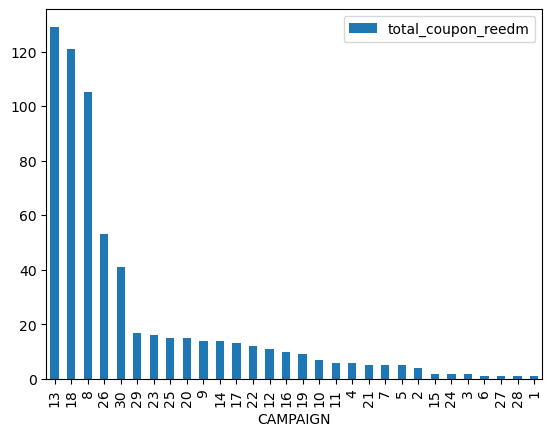

In [409]:
COUPON_REDEMPT_RAW.groupby('CAMPAIGN').agg(total_coupon_reedm=('COUPON_UPC','nunique')).sort_values(by='total_coupon_reedm',ascending=False).plot.bar()
plt.show()

In [410]:
Coupon_redeem = COUPON_REDEMPT_RAW.groupby('CAMPAIGN').agg(total_coupon_reedm=('COUPON_UPC','nunique')).reset_index()

In [411]:
Coupon_redeem.sort_values(by = 'total_coupon_reedm',ascending=False).head(10)

,CAMPAIGN,total_coupon_reedm
12,13,129
17,18,121
7,8,105
25,26,53
29,30,41
28,29,17
22,23,16
24,25,15
19,20,15
8,9,14


In [412]:
TRANSACTION_RAW.head(1)

,HOUSEHOLD_KEY,BASKET_ID,CONVERTED_DATE,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,2020-01-01,1004906,1,1.39,364,-0.6,1631,1,0,0


In [413]:
demographic_raw.head(1)

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,HOUSEHOLD_KEY
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1


In [414]:
COUPON_RAW.head(1)

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4


In [415]:
COUPON_REDEMPT_RAW.head(1)

,HOUSEHOLD_KEY,DAY,COUPON_UPC,CAMPAIGN
0,1,2021-02-24,10000085364,8


In [416]:
CAMPAIGN_DESC_RAW.head(1)

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,CAMP_DURATION
0,TypeB,24,2021-10-20,2021-12-19,60


In [417]:
CAMPAIGN_RAW.head(1)

,DESCRIPTION,HOUSEHOLD_KEY,CAMPAIGN
0,TypeA,17,26


In [418]:
PRODUCT_RAW.head(1)

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB


In [419]:
coupon_product.head(1)

,COUPON_UPC,PRODUCT_ID,CAMPAIGN,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,10000089061,27160,4,69,GROCERY,Private,SHORTENING/OIL,VEGETABLE/SALAD OIL,48 OZ


In [420]:
Coupon_Given.head(1)

,CAMPAIGN,Total_product,Total_Coupon_Given,DESCRIPTION,START_DAY,END_DAY,CAMP_DURATION
12,13,35616,207,TypeA,2021-05-18,2021-07-04,47


In [ ]:
#password=getpass.getpass("Type the password:")
session = Session.builder.configs({
 "account": "VPXEDAL-EY92372",
 "user": "PRAVAT21",
 #"password": password,
 "password": "",
 "warehouse": "PP_WAREHOUSE",
 "database": "PP_PROJECT",
 "schema": "PUBLIC"
 }).create()

In [422]:
session.write_pandas(TRANSACTION_RAW,'NEW_PP_TRANSACTION',auto_create_table=True,overwrite=True)

In [448]:
session.write_pandas(demographic_raw,'NEW_PP_DEMOGRAPHIC',auto_create_table=True,overwrite=True)

In [424]:
session.write_pandas(COUPON_RAW,'NEW_PP_COUPON',auto_create_table=True,overwrite=True)

In [425]:
session.write_pandas(COUPON_REDEMPT_RAW,'NEW_PP_COUPON_REDEMPT',auto_create_table=True,overwrite=True)

In [426]:
session.write_pandas(CAMPAIGN_DESC_RAW,'NEW_PP_CAMPAIGN_DESC',auto_create_table=True,overwrite=True)

In [427]:
session.write_pandas(CAMPAIGN_RAW,'NEW_PP_CAMPAIGN',auto_create_table=True,overwrite=True)

In [428]:
session.write_pandas(PRODUCT_RAW,'NEW_PP_PRODUCT',auto_create_table=True,overwrite=True)

In [429]:
session.write_pandas(coupon_product,'NEW_PP_COUPON_PRODUCT',auto_create_table=True,overwrite=True)

In [446]:
session.write_pandas(Coupon_Given,'NEW_PP_COUPON_GIVEN',auto_create_table=True,overwrite=True)